In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import user_agents
import requests, json

# Task1: sendy_logistics.csv

In [78]:
sendy = pd.read_csv('sendy_logistics.csv').sample(10)
sendy['Temperature'] = sendy['Temperature'].fillna(0)
sendy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 10864 to 8496
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   10 non-null     object 
 1   User Id                                    10 non-null     object 
 2   Vehicle Type                               10 non-null     object 
 3   Platform Type                              10 non-null     int64  
 4   Personal or Business                       10 non-null     object 
 5   Placement - Day of Month                   10 non-null     int64  
 6   Placement - Weekday (Mo = 1)               10 non-null     int64  
 7   Placement - Time                           10 non-null     object 
 8   Confirmation - Day of Month                10 non-null     int64  
 9   Confirmation - Weekday (Mo = 1)            10 non-null     int64  
 10  Confirmation - Time   

In [71]:
sendy.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,1.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.800000,21.100000,3.100000,21.100000,3.100000,21.100000,3.100000,21.100000,3.100000,21.100000,3.100000,11.10000,20.300000,13.9,-1.273117,36.819285,-1.302541,36.823340,1369.300000
std,0.632456,9.290975,1.197219,9.290975,1.197219,9.290975,1.197219,9.290975,1.197219,9.290975,1.197219,7.14065,7.682737,NaN,0.026521,0.045718,0.046919,0.052824,900.805448
min,1.000000,6.000000,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,2.000000,3.00000,0.000000,13.9,-1.307787,36.768822,-1.403900,36.754365,5.000000
25%,3.000000,13.750000,2.250000,13.750000,2.250000,13.750000,2.250000,13.750000,2.250000,13.750000,2.250000,6.50000,20.250000,13.9,-1.288628,36.783305,-1.300295,36.788117,816.500000
50%,3.000000,25.000000,3.000000,25.000000,3.000000,25.000000,3.000000,25.000000,3.000000,25.000000,3.000000,8.00000,23.150000,13.9,-1.280310,36.808528,-1.296680,36.809347,1204.500000
75%,3.000000,29.250000,3.000000,29.250000,3.000000,29.250000,3.000000,29.250000,3.000000,29.250000,3.000000,15.25000,24.725000,13.9,-1.257632,36.838845,-1.269190,36.847386,1888.250000
max,3.000000,30.000000,6.000000,30.000000,6.000000,30.000000,6.000000,30.000000,6.000000,30.000000,6.000000,23.00000,25.300000,13.9,-1.215601,36.897534,-1.256045,36.910825,2736.000000


In [72]:
sendy

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
3275,Order_No_4245,User_Id_1500,Bike,3,Business,9,2,8:42:20 AM,9,2,...,9:41:44 AM,4,21.0,NaN,-1.307787,36.844321,-1.300406,36.829741,Rider_Id_43,432
3920,Order_No_10700,User_Id_2828,Bike,3,Business,13,3,12:42:58 PM,13,3,...,1:47:48 PM,22,20.0,NaN,-1.264960,36.798178,-1.403900,36.754365,Rider_Id_620,2670
5910,Order_No_13891,User_Id_81,Bike,3,Business,30,3,11:08:22 AM,30,3,...,12:10:17 PM,16,24.9,NaN,-1.215601,36.891686,-1.264150,36.791414,Rider_Id_869,1951
12362,Order_No_14328,User_Id_3239,Bike,3,Personal,16,3,3:45:51 PM,16,3,...,4:11:12 PM,6,25.3,NaN,-1.276154,36.822416,-1.298203,36.809263,Rider_Id_100,738
12310,Order_No_2602,User_Id_3222,Bike,3,Business,23,4,2:55:07 PM,23,4,...,3:38:04 PM,8,24.5,NaN,-1.255189,36.782203,-1.295156,36.809431,Rider_Id_448,1052
1022,Order_No_6011,User_Id_3727,Bike,3,Business,27,2,11:26:50 AM,27,2,...,12:02:48 PM,8,24.0,NaN,-1.296310,36.768822,-1.260062,36.787018,Rider_Id_649,1700
19247,Order_No_14481,User_Id_3565,Bike,3,Business,27,6,11:11:07 AM,27,6,...,1:37:55 PM,23,0.0,NaN,-1.284467,36.786611,-1.284312,36.907984,Rider_Id_648,2736
10911,Order_No_11270,User_Id_1876,Bike,1,Personal,6,3,8:48:57 AM,6,3,...,10:18:09 AM,8,16.2,13.9,-1.289498,36.818878,-1.299963,36.853268,Rider_Id_846,1171
1927,Order_No_15548,User_Id_3688,Bike,3,Business,30,3,10:27:10 AM,30,3,...,10:37:28 AM,3,24.8,NaN,-1.255189,36.782203,-1.256045,36.780087,Rider_Id_191,5
10527,Order_No_1494,User_Id_552,Bike,3,Business,30,2,9:50:20 AM,30,2,...,11:00:17 AM,13,22.3,NaN,-1.286018,36.897534,-1.363216,36.910825,Rider_Id_397,1238


In [82]:
#api_key = "5198d07d1c800beedcb166fb6b4003aa"
#lat = "-1.317755"
#lon = "36.830370"
#url = "https://api.openweathermap.org/data/2.5/onecall?lat=%s&lon=%s&appid=%s&units=metric" % (lat, lon, api_key)
#response = requests.get(url)
#data = json.loads(response.text)
#current = data["current"]["temp"]
#print(current)

def currenttemp(latitude, longitude):
    api_key = "5198d07d1c800beedcb166fb6b4003aa"
    url = "https://api.openweathermap.org/data/2.5/onecall?lat=%s&lon=%s&appid=%s&units=metric" % (str(latitude), str(longitude), api_key)
    response = requests.get(url)
    data = json.loads(response.text)
    current = data["current"]["temp"]
    return current
   
#sendy.apply(currenttemp(latitude, long=sendy['Pickup Long']), axis=1)
#sendy['Current Temp'] = sendy['Pickup Lat'].apply(currenttemp)
#sendy['Current Temp'] = sendy[['Pickup Lat', 'Pickup Long']].apply(currenttemp)
sendy['Current Temp'] = sendy.apply(lambda x: currenttemp(x['Pickup Lat'], x['Pickup Long']), axis=1)
sendy['Temp_Diff'] = sendy['Temperature'] - sendy['Current Temp']
sendy['Speed'] = sendy['Distance (KM)']*1000 / sendy['Time from Pickup to Arrival']
sendy['Fehr_Temp'] = sendy['Temperature']*1.8 + 32

In [83]:
sendy

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Current Temp,Temp_Diff,Speed,Fehr_Temp
10864,Order_No_9514,User_Id_2947,Bike,1,Personal,17,1,3:57:34 PM,17,1,...,-1.262490,36.799715,-1.273148,36.795080,Rider_Id_727,619,13.63,14.47,4.846527,82.58
4302,Order_No_24776,User_Id_552,Bike,3,Business,24,1,2:52:26 PM,24,1,...,-1.279395,36.825364,-1.363216,36.910825,Rider_Id_194,1591,13.88,10.92,10.685104,76.64
21123,Order_No_6266,User_Id_3718,Bike,3,Business,9,2,9:58:51 AM,9,2,...,-1.265003,36.812624,-1.333994,36.726341,Rider_Id_948,3897,13.78,3.82,4.875545,63.68
13728,Order_No_19995,User_Id_90,Bike,1,Personal,18,3,1:53:10 PM,18,3,...,-1.256958,36.814493,-1.294624,36.814874,Rider_Id_415,1729,13.72,6.78,4.048583,68.90
13915,Order_No_11939,User_Id_443,Bike,1,Personal,22,6,1:19:30 PM,22,6,...,-1.285776,36.823662,-1.274755,36.790658,Rider_Id_85,605,13.81,-13.81,8.264463,32.00
17464,Order_No_6551,User_Id_2509,Bike,3,Business,25,2,4:19:37 PM,25,2,...,-1.305399,36.822185,-1.257147,36.795063,Rider_Id_612,1258,13.69,13.51,6.359300,80.96
11053,Order_No_20778,User_Id_1856,Bike,3,Business,15,2,11:52:01 AM,15,2,...,-1.273894,36.803581,-1.288370,36.826943,Rider_Id_862,29,13.69,10.51,172.413793,75.56
5415,Order_No_3065,User_Id_3283,Bike,3,Business,21,3,9:04:53 AM,21,3,...,-1.228911,36.881876,-1.262847,36.781805,Rider_Id_237,1497,14.06,3.04,9.352037,62.78
14318,Order_No_7541,User_Id_914,Bike,3,Business,8,4,2:21:27 PM,8,4,...,-1.400779,36.763071,-1.267021,36.799448,Rider_Id_845,3382,13.17,13.93,6.209344,80.78
8496,Order_No_23882,User_Id_867,Bike,3,Business,21,3,7:46:26 AM,21,3,...,-1.257422,36.792707,-1.306378,36.751984,Rider_Id_762,1170,13.57,3.43,7.692308,62.60


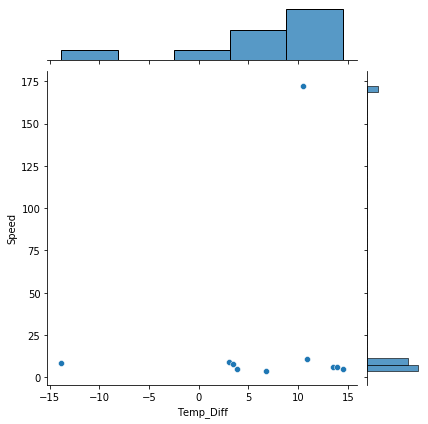

In [81]:
sns.jointplot(data = sendy, x = 'Temp_Diff', y = 'Speed')

# Task2: ufo.csv

In [85]:
ufo = pd.read_csv('ufo.csv')
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [86]:
ufo.describe()

,City,Colors Reported,Shape Reported,State,Time
count,18216,2882,15597,18241,18241
unique,6476,27,27,52,16145
top,Seattle,RED,LIGHT,CA,11/16/1999 19:00
freq,187,780,2803,2529,27


In [87]:
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [92]:
ufo['Time'] = pd.to_datetime(ufo['Time'], errors = 'coerce', format="%m/%d/%Y %H:%M")

In [96]:
ufo['Month'] = ufo['Time'].dt.month
ufo['Month_Name'] = ufo['Time'].dt.month_name()
ufo

,City,Colors Reported,Shape Reported,State,Time,Month,Month_Name,IN_December
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6,June,0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6,June,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2,February,0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6,June,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4,April,0
...,...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,12,December,1
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,12,December,1
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,12,December,1
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,12,December,1


In [97]:
def isDecember(month):
    if month == 12:
        return 1
    else:
        return 0
    
ufo['IN_December'] = ufo['Time'].dt.month.apply(isDecember)
ufo

,City,Colors Reported,Shape Reported,State,Time,Month,Month_Name,IN_December
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6,June,0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6,June,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2,February,0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6,June,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4,April,0
...,...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,12,December,1
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,12,December,1
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,12,December,1
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,12,December,1


In [101]:
ufo['Time_Diff_From_WW1'] = (ufo['Time'] - datetime(1914,6,28))/np.timedelta64(1, 'Y')
ufo

,City,Colors Reported,Shape Reported,State,Time,Month,Month_Name,IN_December,Time_Diff_From_WW1
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6,June,0,15.928915
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6,June,0,16.008086
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2,February,0,16.637120
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6,June,0,16.927224
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4,April,0,18.808851
...,...,...,...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,12,December,1,86.515009
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,12,December,1,86.515009
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,12,December,1,86.515095
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,12,December,1,86.515095


# Task3: titanic_full.csv

In [102]:
titanic = pd.read_csv('titanic_full.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [129]:
def title(Name):
    first = Name.split(',')
    second = first[1].split('.')
    return second[0]
    
    
    
titanic['Title'] = titanic['Name'].apply(title)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [127]:
titanic['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Don               1
 Capt              1
 Sir               1
 the Countess      1
 Jonkheer          1
 Lady              1
 Ms                1
 Mme               1
Name: Title, dtype: int64

In [130]:
titanic[titanic['Title'] == ' Mme']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C,Mme


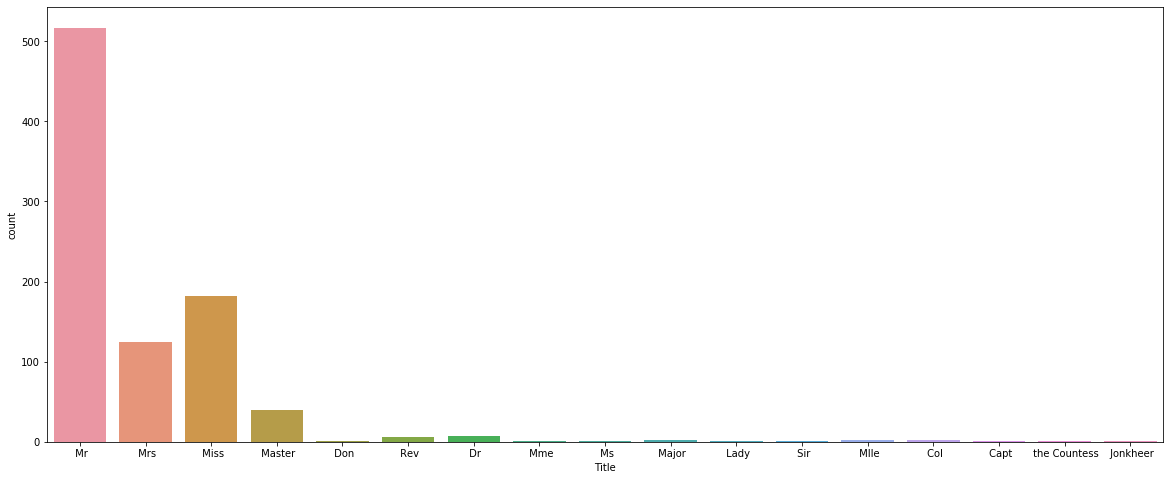

In [126]:
a4_dims = (20, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data = titanic, x = 'Title')

In [131]:
sendy

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Current Temp,Temp_Diff,Speed,Fehr_Temp
10864,Order_No_9514,User_Id_2947,Bike,1,Personal,17,1,3:57:34 PM,17,1,...,-1.262490,36.799715,-1.273148,36.795080,Rider_Id_727,619,13.63,14.47,4.846527,82.58
4302,Order_No_24776,User_Id_552,Bike,3,Business,24,1,2:52:26 PM,24,1,...,-1.279395,36.825364,-1.363216,36.910825,Rider_Id_194,1591,13.88,10.92,10.685104,76.64
21123,Order_No_6266,User_Id_3718,Bike,3,Business,9,2,9:58:51 AM,9,2,...,-1.265003,36.812624,-1.333994,36.726341,Rider_Id_948,3897,13.78,3.82,4.875545,63.68
13728,Order_No_19995,User_Id_90,Bike,1,Personal,18,3,1:53:10 PM,18,3,...,-1.256958,36.814493,-1.294624,36.814874,Rider_Id_415,1729,13.72,6.78,4.048583,68.90
13915,Order_No_11939,User_Id_443,Bike,1,Personal,22,6,1:19:30 PM,22,6,...,-1.285776,36.823662,-1.274755,36.790658,Rider_Id_85,605,13.81,-13.81,8.264463,32.00
17464,Order_No_6551,User_Id_2509,Bike,3,Business,25,2,4:19:37 PM,25,2,...,-1.305399,36.822185,-1.257147,36.795063,Rider_Id_612,1258,13.69,13.51,6.359300,80.96
11053,Order_No_20778,User_Id_1856,Bike,3,Business,15,2,11:52:01 AM,15,2,...,-1.273894,36.803581,-1.288370,36.826943,Rider_Id_862,29,13.69,10.51,172.413793,75.56
5415,Order_No_3065,User_Id_3283,Bike,3,Business,21,3,9:04:53 AM,21,3,...,-1.228911,36.881876,-1.262847,36.781805,Rider_Id_237,1497,14.06,3.04,9.352037,62.78
14318,Order_No_7541,User_Id_914,Bike,3,Business,8,4,2:21:27 PM,8,4,...,-1.400779,36.763071,-1.267021,36.799448,Rider_Id_845,3382,13.17,13.93,6.209344,80.78
8496,Order_No_23882,User_Id_867,Bike,3,Business,21,3,7:46:26 AM,21,3,...,-1.257422,36.792707,-1.306378,36.751984,Rider_Id_762,1170,13.57,3.43,7.692308,62.60


In [149]:
def ID(userid):
    first = userid.split('_')
    return first[2]

sendy['ID'] = sendy['User Id'].apply(ID)
sendy

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Current Temp,Temp_Diff,Speed,Fehr_Temp,ID
10864,Order_No_9514,User_Id_2947,Bike,1,Personal,17,1,3:57:34 PM,17,1,...,36.799715,-1.273148,36.795080,Rider_Id_727,619,13.63,14.47,4.846527,82.58,2947
4302,Order_No_24776,User_Id_552,Bike,3,Business,24,1,2:52:26 PM,24,1,...,36.825364,-1.363216,36.910825,Rider_Id_194,1591,13.88,10.92,10.685104,76.64,552
21123,Order_No_6266,User_Id_3718,Bike,3,Business,9,2,9:58:51 AM,9,2,...,36.812624,-1.333994,36.726341,Rider_Id_948,3897,13.78,3.82,4.875545,63.68,3718
13728,Order_No_19995,User_Id_90,Bike,1,Personal,18,3,1:53:10 PM,18,3,...,36.814493,-1.294624,36.814874,Rider_Id_415,1729,13.72,6.78,4.048583,68.90,90
13915,Order_No_11939,User_Id_443,Bike,1,Personal,22,6,1:19:30 PM,22,6,...,36.823662,-1.274755,36.790658,Rider_Id_85,605,13.81,-13.81,8.264463,32.00,443
17464,Order_No_6551,User_Id_2509,Bike,3,Business,25,2,4:19:37 PM,25,2,...,36.822185,-1.257147,36.795063,Rider_Id_612,1258,13.69,13.51,6.359300,80.96,2509
11053,Order_No_20778,User_Id_1856,Bike,3,Business,15,2,11:52:01 AM,15,2,...,36.803581,-1.288370,36.826943,Rider_Id_862,29,13.69,10.51,172.413793,75.56,1856
5415,Order_No_3065,User_Id_3283,Bike,3,Business,21,3,9:04:53 AM,21,3,...,36.881876,-1.262847,36.781805,Rider_Id_237,1497,14.06,3.04,9.352037,62.78,3283
14318,Order_No_7541,User_Id_914,Bike,3,Business,8,4,2:21:27 PM,8,4,...,36.763071,-1.267021,36.799448,Rider_Id_845,3382,13.17,13.93,6.209344,80.78,914
8496,Order_No_23882,User_Id_867,Bike,3,Business,21,3,7:46:26 AM,21,3,...,36.792707,-1.306378,36.751984,Rider_Id_762,1170,13.57,3.43,7.692308,62.60,867


# Task 4: visitor-interests.csv

In [182]:
visitor = pd.read_csv('visitor-interests.csv')
visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19926 entries, 0 to 19925
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IP         19926 non-null  object
 1   UserAgent  19926 non-null  object
 2   Country    16721 non-null  object
 3   Languages  19926 non-null  object
 4   Interests  19919 non-null  object
dtypes: object(5)
memory usage: 778.5+ KB


In [183]:
visitor.drop(index=range(50,19926), axis = 0, inplace = True)
visitor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IP         50 non-null     object
 1   UserAgent  50 non-null     object
 2   Country    50 non-null     object
 3   Languages  50 non-null     object
 4   Interests  50 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


In [184]:
visitor

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company
5,1.124.48.210,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company
6,1.124.48.99,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company
7,1.126.48.118,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,AU,english,company
8,1.126.48.171,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,AU,english,company
9,1.126.48.47,Mozilla/5.0 (iPhone; CPU iPhone OS 7_0_4 like ...,AU,english,company


In [185]:
def extract(ua_string):
    user_agent = user_agents.parse(ua_string)
    return pd.Series((user_agent.browser, user_agent.os, user_agent.device))

visitor[['Browser', 'OS', 'Device']] = visitor['UserAgent'].apply(extract)
visitor.head(50)

,IP,UserAgent,Country,Languages,Interests,Browser,OS,Device
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,"(Chrome, (53, 0, 2785), 53.0.2785)","(Windows, (7,), 7)","(Other, None, None)"
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,"(Chrome, (52, 0, 2743), 52.0.2743)","(Windows, (10,), 10)","(Other, None, None)"
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,"(Chrome, (52, 0, 2743), 52.0.2743)","(Windows, (7,), 7)","(Other, None, None)"
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,"(Chrome, (52, 0, 2743), 52.0.2743)","(Android, (7, 0), 7.0)","(Nexus 9, Generic_Android_Tablet, Nexus 9)"
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,"(Mobile Safari, (9, 0), 9.0)","(iOS, (9, 3, 5), 9.3.5)","(iPad, Apple, iPad)"
5,1.124.48.210,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company,"(Samsung Internet, (2, 1), 2.1)","(Android, (5, 0), 5.0)","(Samsung SM-G900I, Samsung, SM-G900I)"
6,1.124.48.99,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company,"(Samsung Internet, (4, 0), 4.0)","(Android, (5, 0), 5.0)","(Samsung SM-G900I, Samsung, SM-G900I)"
7,1.126.48.118,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,AU,english,company,"(IE, (11, 0), 11.0)","(Windows, (8, 1), 8.1)","(Other, None, None)"
8,1.126.48.171,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,AU,english,company,"(Firefox, (48, 0), 48.0)","(Mac OS X, (10, 11), 10.11)","(Mac, Apple, Mac)"
9,1.126.48.47,Mozilla/5.0 (iPhone; CPU iPhone OS 7_0_4 like ...,AU,english,company,"(Mobile Safari, (7, 0), 7.0)","(iOS, (7, 0, 4), 7.0.4)","(iPhone, Apple, iPhone)"


In [191]:
from ip2geotools.databases.noncommercial import DbIpCity

def extractloc(ip):
    response = DbIpCity.get(ip, api_key='free')
    return pd.Series([response.latitude, response.longitude])

visitor[['Latitude', 'Longitude']] = visitor['IP'].apply(extractloc)

visitor

,IP,UserAgent,Country,Languages,Interests,Browser,OS,Device,Latitude,Longitude
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,"(Chrome, (53, 0, 2785), 53.0.2785)","(Windows, (7,), 7)","(Other, None, None)",NaN,NaN
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,"(Chrome, (52, 0, 2743), 52.0.2743)","(Windows, (10,), 10)","(Other, None, None)",NaN,NaN
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,"(Chrome, (52, 0, 2743), 52.0.2743)","(Windows, (7,), 7)","(Other, None, None)",35.643227,139.740055
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,"(Chrome, (52, 0, 2743), 52.0.2743)","(Android, (7, 0), 7.0)","(Nexus 9, Generic_Android_Tablet, Nexus 9)",-34.928181,138.599931
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,"(Mobile Safari, (9, 0), 9.0)","(iOS, (9, 3, 5), 9.3.5)","(iPad, Apple, iPad)",-33.854816,151.216454
5,1.124.48.210,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company,"(Samsung Internet, (2, 1), 2.1)","(Android, (5, 0), 5.0)","(Samsung SM-G900I, Samsung, SM-G900I)",-34.928181,138.599931
6,1.124.48.99,Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-G9...,AU,english,company,"(Samsung Internet, (4, 0), 4.0)","(Android, (5, 0), 5.0)","(Samsung SM-G900I, Samsung, SM-G900I)",-34.928181,138.599931
7,1.126.48.118,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,AU,english,company,"(IE, (11, 0), 11.0)","(Windows, (8, 1), 8.1)","(Other, None, None)",-30.784484,125.171489
8,1.126.48.171,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,AU,english,company,"(Firefox, (48, 0), 48.0)","(Mac OS X, (10, 11), 10.11)","(Mac, Apple, Mac)",-30.784484,125.171489
9,1.126.48.47,Mozilla/5.0 (iPhone; CPU iPhone OS 7_0_4 like ...,AU,english,company,"(Mobile Safari, (7, 0), 7.0)","(iOS, (7, 0, 4), 7.0.4)","(iPhone, Apple, iPhone)",-30.784484,125.171489
